# Exploratory Data Analysis

Exploratory data analysis is the first step towards solving any data science or machine learning problem. It refers to the critical process of performing initial investigations on the data we have available and getting familiar with it. EDA makes a thorough examination on our dataset to find trends, patterns, and relationships between features within the data with the help of graphs and plots using libraries like Matplotlib and Seaborn. We will also be using the Pandas library. Pandas makes importing, analysing and visualizing much easier.
In this section, we will use the Titanic dataset, a popular introductory dataset, to learn the step by step exploratory data analysis process. The purpose is to bring the reader in the position of going on with its own ideas, and by the end of this course searching for a dataset with a subject of its own interest to explore.

### Understanding the problem statement

Before we begin to solve the problem, we need to make sure we understand the problem statement very well. 

Problem definition: 

The sinking of the Titanic resulted in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. Apparently there were some patterns in the people who died and the people who survived. The problem here is that we are given certain data with specific characteristics of each passenger and the data is already labeled which let us know if the passenger lived or died. We have also been given a test dataset with more Titanic passengers and their characteristics but this dataset is not labeled, so we don't know who lived and who died. 

We need to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). To be able to predict which passengers were more likely to survive we will use a couple of algorithms to train the first dataset and when we decide which one is the best, we will use it to predict what passengers in the unlabeled dataset survived.

For this specific section, we will focus on the Titanic exploratory data analysis only.


-The complete problem statement and data description can be found here:

https://www.kaggle.com/competitions/titanic/

### Importing libraries and reading the dataset

Our next step is to read in the data and do some preliminary exploration. This will help us figure out how we want to approach creating groups and finding patterns. In order to do that we need to import some necessary libraries (for this example). In case any of them does not appear, make sure to install it.

In [3]:
#Importing necessary libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns

The data is stored as a comma-separated values, or csv file, where each row is separated by a new line, and each column by a comma (,). In order to read in the data, we’ll need to use the pandas.read_csv function. This function will take in a csv file and return a DataFrame.

In [4]:
#Reading the train and test data and assign to a variable

train_data = pd.read_csv("../assets/titanic_train.csv")
test_data = pd.read_csv("../assets/titanic_test.csv")

### Finding dimensions, shape, size of the dataframe using Pandas


After reading the dataframes available, we will analyze their shape, size and the kind of data available.
We will do this for both train and test dataset. It is important to also write observations at the end of each step. 
In this initial data exploration we will use:

-data.head() returns the first 5 rows of the dataframe

-data.shape displays the number of rows and number of columns of the dataframe

-data.info() prints a concise summary with the index dtype, column dtypes, non-null values and memory usage.

In [5]:
#Let's see how many rows and columns does my train_data has.
train_data.shape

(891, 12)

In [6]:
#Looking at the first rows of our train_data. If we want to see more than 5 rows, we just have to add the number of rows as parameter.
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Let's look at some information aboyt data types and null values.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Observations: 

-We can see that our train_data has 891 rows and 12 columns.

-Our data has 7 numerical features and 5 categorical features.

-Feature 'Age' has 714 non-null values from a total of 891 rows, which means that our 'Age' column has 177 null values.
The same happens with our 'Cabin' feature having 687 null values, and 'Embarked' feature with 2 null values.

Now, we will do the same analysis for our test_data:

In [8]:
#Let's see how many rows and columns does my test_data has.
test_data.shape

(418, 11)

In [9]:
#Let's look at the first 3 rows of our test_data
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [10]:
#Let's see the data types and which features have null values in our test_data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Observations:

-We can see that our test_data has 418 rows and 11 columns. There is one column less than our train_data because this new dataset is not labeled so we don't have the column that indicates whether the passenger died or survived.

-Our test_data has the same data types as our train_data for each feature.

-This time the 'Age' feature has 86 null values, and our 'Cabin' feature has 327 null values from the 418 total number of rows.

### Exploring data columns

Now we need to find some insights from the dataset to see if there is any kind of hidden pattern or relationship between columns.
We will start with the 'Survived' column which seems to be our target variable as it is not given to us in the test dataset.

**Target variable**

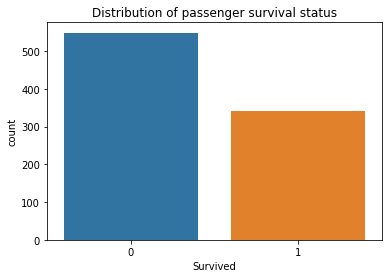

In [11]:
#Let's first visualize the distribution of our target variable.

sns.countplot(x=train_data['Survived'])
plt.title('Distribution of passenger survival status')
plt.show()

In [12]:
train_data['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

Observations: As our target variable is supposed to classify passengers in 1 or 0, whether they survive or not, we used a countplot to see if the data is balanced. We also used the method value_counts() to see exactly how many people survived(1) and how many did not survived(0) in our train_data. It is balanced and we know for a fact that the sinking ok Titanic resulted in the death of most of its passengers.

**Categorical variables**

In [13]:
#Let's check the categories in each of our object type features

def countplot_features(feature):
    plot=sns.countplot(x=feature,data=train_data)
    plt.show()

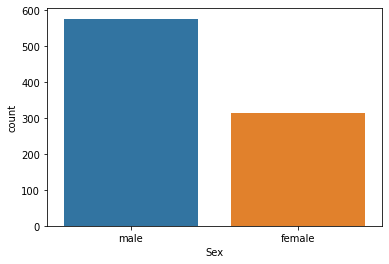

In [14]:
countplot_features('Sex')

Observations: 

Most of our data passengers were male.

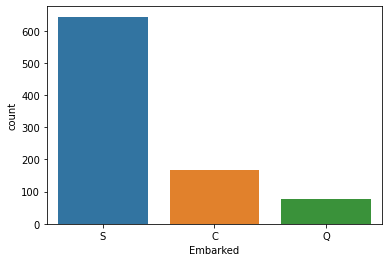

In [15]:
countplot_features('Embarked')

Observations: 

Most of our Titanic passengers embarked by the Southampton station.

(0.0, 1.05)

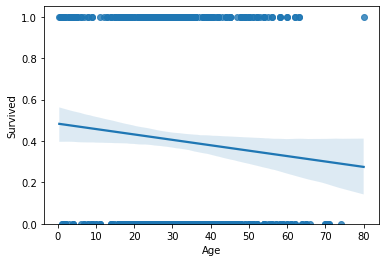

In [16]:
#View if there is a linear relation between continuous numerical variable Age & target variable Survived.

sns.regplot(x = "Age", y = "Survived", data = train_data)
plt.ylim(0,)

Observations:

There is clear negative linear relation between Age and our target variable. This makes sense considering that children was one of the groups who had preference in using the boats to survive (Survive = 1).

(0.0, 2.0909258263992867)

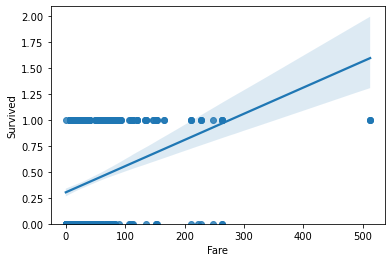

In [17]:
# View if there is a linear relation between continuous numerical variable Fare & target variable Survived.

sns.regplot(x = "Fare", y = "Survived", data = train_data)
plt.ylim(0,)

Observations: 

Yes, there is a positive linear relation between 'Fare' and 'Survived' feature which means that people who paid a more expensive fare had more probabilities to survive (Survive = 1).

### Plotting different features against one other using heatmaps

Correlations between variables can be found using pandas “.corr()” function and visualized with a matrix by using a heatmap in seaborn.
The following heatmap shows some strong and weak correlations between variables. Dark shades represent negative correlation while lighter shades represent positive correlation.

<AxesSubplot:>

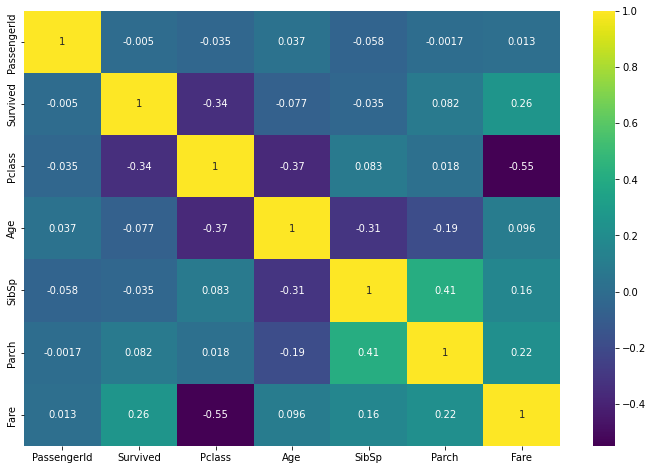

In [18]:
#Plotting a heatmap to find relations between features

plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='viridis')

Observations:

Here you can infer that there is a strong negative relation between Fare and PClass. This is totally understandable because if a passenger instead of buying a ticket in 1st class (PClass = 1), decided to buy a ticket in 3rd class (PClass = 3), the ticket fare would certainly decrease.

There is also a negative relation between the passenger class (pclass) and the age of the passenger. That means that 3rd class (Pclass = 3) had younger passengers that the 1st class (Pclass = 1).

### Detecting outliers

In statistics, an outlier is an observation point that is distant from other observations. In data, it means that our dataframe feature has some extreme values which we need to analyse further. Those extreme values may be typing errors, or they may be extreme values but considered normal in the population we are studying. In the case our outliers are typing errors we need to decide if we are going to eliminate them or replace them with another value. In the case a feature's outliers are considered normal and part of the population, it may be better if we keep them because it will give important information to ur model. 

How important we consider the feature for our model will influence in our decision about what to do with outliers.

Pandas describe() method is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. In the case we would like to see the object type features using describe(), this should be entered as dataframe.describe(include='O') and it will show us the most frequent value and how many times it appears.

Syntax: 

DataFrame.describe(percentiles=None, include=None, exclude=None)

Parameters:

percentile: list like data type of numbers between 0-1 to return the respective percentile

include: List of data types to be included while describing dataframe. Default is None

exclude: List of data types to be Excluded while describing dataframe. Default is None

Return type: Statistical summary of data frame.

In [8]:
#Let's use the describe method to see the statistics on our numerical features

train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#Now, let's modify its parameters to be able to see some statistics on our categorical features.

train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**Why is this useful to find outliers?**

In the numerical features, we can look at the min and max value for a especific feature, and compare it to its 25% and 75% percentile. We can also compare the mean to the 50% percentile and confirm if there is any extreme high or low value making my mean go up or down, much more than the 50% percentile.

Once we suspect there are outliers, we can use a boxplot for that feature to have a better visualization of outliers.

Observations: According to our statistics dataframe, everything seems normal except for the 'Fare' column which has a mean of 32.20 but its 50% percentile is 14, and its max value is 512. We could say 512 seems to be an outlier but it could be a typing error,but it is possible that the most expensive ticket had that price. It would be useful if we do some research and confirm that information.

Let's see how to write the code for a boxplot in order to visualize outliers.
A box plot shows the distribution of quantitative data in a way that facilitates comparisons between variables.The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.

Text(0, 0.5, 'Fare')

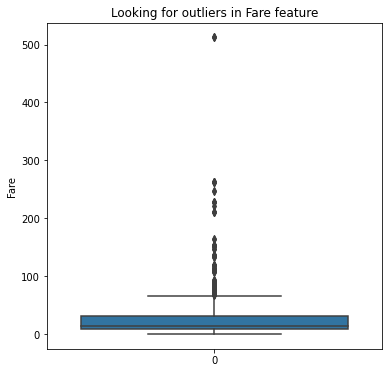

In [13]:
#Let's evaluate our 'Fare' variable.

plt.figure(figsize=(6,6))
sns.boxplot(data=train_data['Fare'])
plt.title('Looking for outliers in Fare feature')
plt.ylabel('Fare')

Observations: 

-It looks like the ticket fare of 512 is not very common. We should establish some upper and lower bounds to determine whether a data point should be considered or not an outlier. There are a couple of ways to determine this and we will learn about them in the data cleaning process.

### Finding missing or null values

Most of the machine learning algorithms are not able to handle missing values. Having some missing values is normal. What we want to identify at this stage are big holes in the dataset with features that have a lot of missing values.

We begin by separating our features into numerical and categorical columns. We do this because the method to handle missing values, later, will be different for these two data types.

In [16]:
# Separate numerical and categorical variables.

num_vars = train_data.columns[train_data.dtypes != 'object']
cat_vars = train_data.columns[train_data.dtypes == 'object']

print("Numerical variables:", num_vars)
print("Categorical variables:", cat_vars)

Numerical variables: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Categorical variables: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


We will use the pandas “isnull()” function to find out all the fields which have missing values. This will return True if a field has missing values and false if the field does not have missing values. 
To get how many missing values are in each column we use sum() along with isnull(). This will sum up all the True’s in each column. 

In [24]:
train_data[num_vars].isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [25]:
train_data[cat_vars].isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

Now, sort_values() will sort the missing values in ascending order. It is always a good practice to sort them in descending order so we can see the columns that have the highest number of missing values first.

In [23]:
train_data[num_vars].isnull().sum().sort_values(ascending=False)

Age            177
PassengerId      0
Survived         0
Pclass           0
SibSp            0
Parch            0
Fare             0
dtype: int64

Finally , we can divide that result by the length of our dataframe (the number of rows) in order to get the percentage of missing values in each column. Missing values are usually represented in the form of Nan, null or None in the dataset.

In [26]:
train_data[num_vars].isnull().sum().sort_values(ascending=False)/len(train_data)

Age            0.198653
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
SibSp          0.000000
Parch          0.000000
Fare           0.000000
dtype: float64

### Eliminating duplicated data

Duplicates are entries that represent the same sample point multiple times. For example, if a measurement or record was registered twice by two different people. Detecting such duplicates is not always easy, as each dataset might have a unique identifier (e.g. an index number or an ID that is unique to each new sample). If we are not sure yet about which is the column that identifies each unique sample, we might want to ignore them first. And once we are aware about the number of duplicates in our dataset, we can simply drop them with drop_duplicates().

In the case of our dataset, it is not difficult to find that unique identifier column because it's column name is very clear: PassengerId.

In [19]:
n_duplicates = train_data['PassengerId'].duplicated().sum()

print(f'It seems that there are {n_duplicates} duplicated passenger according to the PassengerId feature')

It seems that there are 0 duplicated passenger according to the PassengerId feature


**Pandas drop_duplicates() Function Syntax:**

DataFrame.drop_duplicates(subset=None, keep=’first’, inplace=False)

**Pandas drop_duplicates() Function Parameters:**

subset: Subset takes a column or list of column label for identifying duplicate rows. By default, all the columns are used to find the duplicate rows.

keep: allowed values are {‘first’, ‘last’, False}, default ‘first’. If ‘first’, duplicate rows except the first one is deleted. If ‘last’, duplicate rows except the last one is deleted. If False, all the duplicate rows are deleted.

inplace: if True, the source DataFrame itself is changed. By default, source DataFrame remains unchanged and a new DataFrame instance is returned.

Source:

https://www.dataquest.io/blog/pandas-python-tutorial/

https://www.kdnuggets.com/2020/07/exploratory-data-analysis-steroids.html

https://www.dataquest.io/blog/pandas-tutorial-python-2/

https://medium.com/analytics-vidhya/introduction-to-exploratory-data-analysis-for-image-text-based-data-1179e194df3f#:~:text=Exploratory%20data%20analysis%20is%20the%20first%20step%20towards,the%20closer%20you%20get%20to%20solving%20the%20problem.

https://medium.com/epfl-extension-school/advanced-exploratory-data-analysis-eda-with-python-536fa83c578a